In [193]:
import numpy as np 
from numpy import linalg as LA

x = np.genfromtxt('X4.csv', delimiter=',')
y = np.genfromtxt('Y4.csv', delimiter=',')

### a). Loss Function: $\\$
$f(\alpha) = \sum\limits_{i=1}^{40}(\alpha_{0} + \sum\limits_{j=1}^{3}(\alpha_{j}x_{ij}) - y_{i})^{2} \\$


In [194]:
def lossFunction(alpha: np.array, x: np.array, y: np.array) -> float:
    sse = 0
    n = len(y) # number of data points

    for i in range(n):
        sum = alpha @ x[i]
        sse += (sum - y[i])**2
        
    return sse


In [195]:
# Simple example to check my lossFunction is correct
alpha = np.array([1,1,1,1])
x1 = np.array([[1,2,3,4],[1,2,3,4]])
y1 = np.array([5,6])
sse = lossFunction(alpha, x1, y1)
print(x1)
print(y1)
print(sse)

[[1 2 3 4]
 [1 2 3 4]]
[5 6]
41


### b). Gradient Function: $\\$
$ \nabla f(\alpha) = 2\sum\limits_{i=1}^{40} \sum\limits_{j=1}^{3} ((\alpha_{j}x_{ij})-y_{i})(1,x_{ij},x_{ij},x_{ij}) \\ $

In [196]:
def gradFunc(alpha: np.array, x: np.array, y: np.array) -> np.array:
    n = len(y)
    k = x.shape[1]
    gradV = np.empty((k))

    for j in range(k):
        grad = 0
        for i in range(n):
            sum = alpha @ x[i]
            grad += (sum - y[i])*x[i][j]
        gradV[j] = grad*2

    return gradV

In [197]:
# Verify grad func correct with simple example
print(gradFunc(alpha,x1,y1))

[18. 36. 54. 72.]


In [198]:
alpha = np.array([1,1,1,1])
print(f"Evaluating loss function for input array [1,1,1,1]: {lossFunction(alpha,x,y)}")

alpha = np.array([3,2,4,5])
print(f"Evaluating loss function for input array [3,2,4,5]: {lossFunction(alpha,x,y)}")


Evaluating loss function for input array [1,1,1,1]: 1879.527510186076
Evaluating loss function for input array [3,2,4,5]: 109.43344396873157


In [199]:
alpha = np.array([1,1,1,1])
print(f"Evaluating gradient function for input array [1,1,1,1]: {gradFunc(alpha,x,y)}")

alpha = np.array([3,2,4,5])
print(f"Evaluating gradient function for input array [3,2,4,5]: {gradFunc(alpha,x,y)}")

Evaluating gradient function for input array [1,1,1,1]: [-539.73264361 -326.26020931 -277.89207618 -279.79720176]
Evaluating gradient function for input array [3,2,4,5]: [-53.52479292 -42.87725764 -11.2686588    0.53380488]


In [200]:


def runBatchGradientDescent(T: int, gamma: float, alpha: np.array, func, gradFunc):
    for i in range(0,T):
        alpha = alpha - gamma*gradFunc(alpha,x,y)
        gradient = gradFunc(alpha,x,y)
        gradNorm = LA.norm(gradient)

    return alpha, gradNorm

### c). Running batch gradient descent:

In [215]:
gammas = np.linspace(.001,.05,100)
minNorm = 99999
bestAlpha = None
bestGamma = 0
for gamma in gammas:
    alpha, gradNorm = runBatchGradientDescent(T=100, gamma=gamma, alpha=np.array([1,1,1,1]), func=lossFunction, gradFunc=gradFunc)
    if gradNorm < minNorm:
        minNorm = gradNorm
        bestAlpha = alpha
        bestGamma = gamma

print(f"Minimum norm: {minNorm}")
print(f"Best Alpha Coefficients: {bestAlpha}")
print(f"Best gamma found: {bestGamma}")

Minimum norm: 0.008648865484868382
Best Alpha Coefficients: [5.07653869 4.76822884 2.23991739 0.92196265]
Best gamma found: 0.012383838383838386


In [216]:
def runBatchGradientDescentReport(T: int, gamma: float, alpha: np.array, func, gradFunc):
    for i in range(0,T):
        alpha = alpha - gamma*gradFunc(alpha,x,y)
        print(f"Iteration: {i}")
        print(f"Function Value: {func(alpha,x,y)}")
        gradient = gradFunc(alpha,x,y)
        gradNorm = LA.norm(gradient)
        print(f"Norm of Gradient: {gradNorm}")
        print(f"Alpha parameters: {alpha}")

In [217]:
runBatchGradientDescentReport(T=100, gamma=bestGamma, alpha=np.array([1,1,1,1]), func=lossFunction, gradFunc=gradFunc)

Iteration: 0
Function Value: 1353.0297640513536
Norm of Gradient: 630.1778304647393
Alpha parameters: [7.68396183 5.0403537  4.44137056 4.46496333]
Iteration: 1
Function Value: 974.7083739043262
Norm of Gradient: 533.9033309931298
Alpha parameters: [2.08372471 1.83834492 1.43008949 1.26818295]
Iteration: 2
Function Value: 702.7989523645176
Norm of Gradient: 452.3419780809284
Alpha parameters: [6.8857808  4.75527305 3.89311748 3.73411424]
Iteration: 3
Function Value: 507.3175366487893
Norm of Gradient: 383.24529289949845
Alpha parameters: [2.87096312 2.47298049 1.72557192 1.42035014]
Iteration: 4
Function Value: 366.73642686220455
Norm of Gradient: 324.7084122557668
Alpha parameters: [6.32165771 4.58112446 3.48752523 3.1721851 ]
Iteration: 5
Function Value: 265.5982078756575
Norm of Gradient: 275.1175767645281
Alpha parameters: [3.44406982 2.95662167 1.9265434  1.4948798 ]
Iteration: 6
Function Value: 192.80314353523448
Norm of Gradient: 233.10564394675148
Alpha parameters: [5.92428023 

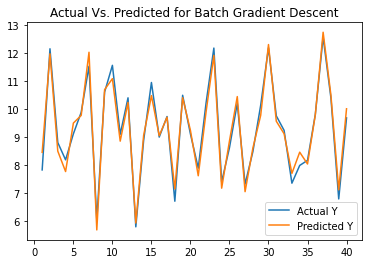

In [204]:
import matplotlib.pyplot as plt 

xaxis = np.arange(1,41)
yhat = x @ bestAlpha
plt.plot(xaxis,y,label='Actual Y')
plt.plot(xaxis,yhat, label='Predicted Y')
plt.legend()
plt.title("Actual Vs. Predicted for Batch Gradient Descent")
plt.show()

### d). Ith Loss Function $\\$
$ f_{i}(\alpha) = (\alpha_{0} + \sum\limits_{j=3}^{3}(\alpha_{j}x_{ij}) - y_{i})^{2} $

In [205]:
def ithLossFunction(i: int, alpha: np.array, x: np.array, y: np.array) -> float:
    sse = 0
    k = x.shape[1]
    temp = alpha[0]
    sum = 0
    for j in range(1,k):
        sum += alpha[j]*x[i][j]
    sse += (temp + sum - y[j])**2

    return sse

In [206]:
# Reporting value of loss function value when i = 1
alpha = np.array([1,1,1,1])
print(f"Evaluating i-th loss function for input array [1,1,1,1]: {ithLossFunction(1,alpha,x,y)}")

alpha = np.array([3,2,4,5])
print(f"Evaluating ith loss function for input array [3,2,4,5]: {ithLossFunction(1,alpha,x,y)}")

Evaluating i-th loss function for input array [1,1,1,1]: 23.1101559646148
Evaluating ith loss function for input array [3,2,4,5]: 9.592008581428102


### e). Ith Gradient Function $\\$
$ \nabla f_{i}(\alpha) =  2\ \sum\limits_{j=1}^{3} ((\alpha_{j}x_{ij})-y_{i})(1,x_{ij},x_{ij},x_{ij}) $

In [207]:
def ithGradFunc(i: int, alpha: np.array, x: np.array, y: np.array):
    k = x.shape[1]
    gradVal = np.empty((k))
    sum = 0
    for j in range(k):
        sum += alpha[j]*x[i][j]
    gradVal[j] = 2*(sum*x[i][j] - y[j])

    return gradVal

In [208]:
alpha = np.array([1,1,1,1])
print(f"Evaluating i-th gradient function for input array [1,1,1,1]: {ithGradFunc(1,alpha,x,y)}")

alpha = np.array([3,2,4,5])
print(f"Evaluating i-th gradient function for input array [3,2,4,5]: {ithGradFunc(1,alpha,x,y)}")

Evaluating i-th gradient function for input array [1,1,1,1]: [264.625       29.2        356.75       -12.10240017]
Evaluating i-th gradient function for input array [3,2,4,5]: [264.625       29.2        356.75        -2.10351443]


### f). Running incremental gradient descent:

In [209]:
def runIncrementalGradientDescent(T: int, gamma: float, alpha: np.array, ithGradFunc):
    i = 1
    n = len(y) # how many data points there are

    for j in range(0,T):
        alpha = alpha - gamma*ithGradFunc(i,alpha,x,y)
        gradient = ithGradFunc(i,alpha,x,y)
        gradNorm = LA.norm(gradient)
        i = (i+1)%n

    return alpha, gradNorm

In [210]:
gammas = np.linspace(.013,.015,1000)
minNorm = 99999
bestAlpha = None
bestGamma = 0
for gamma in gammas:
    alpha, gradNorm = runIncrementalGradientDescent(T=100, gamma=gamma, alpha=np.array([1,1,1,1]), ithGradFunc=ithGradFunc)
    if gradNorm < minNorm:
        minNorm = gradNorm
        bestAlpha = alpha
        bestGamma = gamma

print(f"Minimum norm: {minNorm}")
print(f"Best Alpha Coefficients: {bestAlpha}")
print(f"Best gamma found: {bestGamma}")

Minimum norm: 0.4040612872863833
Best Alpha Coefficients: [ 0.22911162  0.22911162  0.22911162 14.48372063]
Best gamma found: 0.014457457457457457


In [211]:
def runIncrementalGradientDescentReport(T: int, gamma: float, alpha: np.array, ithFunc, ithGradFunc):
    i = 1
    n = len(y) # how many data points there are

    for j in range(0,T):
        alpha = alpha - gamma*ithGradFunc(i,alpha,x,y)
        print(f"Iteration: {j}")
        print(f"Function Value: {ithFunc(i,alpha,x,y)}")
        gradient = ithGradFunc(i,alpha,x,y)
        gradNorm = LA.norm(gradient)
        print(f"Norm of Gradient: {gradNorm}")
        print(f"Alpha parameters: {alpha}")
        i = (i+1)%n

In [212]:
runIncrementalGradientDescentReport(T=100, gamma=bestGamma, alpha=np.array([1,1,1,1]), ithFunc=ithLossFunction, ithGradFunc=ithGradFunc)

Iteration: 0
Function Value: 22.14410228487666
Norm of Gradient: 11.973942698580924
Alpha parameters: [0.99668763 0.99668763 0.99668763 1.17496994]
Iteration: 1
Function Value: 36.22056623460863
Norm of Gradient: 15.547611426931446
Alpha parameters: [0.98227806 0.98227806 0.98227806 1.39848584]
Iteration: 2
Function Value: 35.540339015475986
Norm of Gradient: 14.759522151482063
Alpha parameters: [0.96807682 0.96807682 0.96807682 1.61110211]
Iteration: 3
Function Value: 20.818310456891517
Norm of Gradient: 10.204158282825569
Alpha parameters: [0.95408089 0.95408089 0.95408089 1.75909081]
Iteration: 4
Function Value: 34.64125464284459
Norm of Gradient: 16.21136946135024
Alpha parameters: [0.9402873  0.9402873  0.9402873  1.99221417]
Iteration: 5
Function Value: 24.25243191804184
Norm of Gradient: 14.767505353846968
Alpha parameters: [0.92669314 0.92669314 0.92669314 2.20453295]
Iteration: 6
Function Value: 48.68750062711064
Norm of Gradient: 16.379064298719296
Alpha parameters: [0.913295

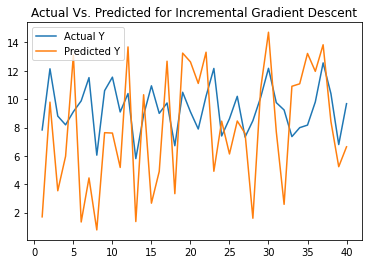

In [213]:
import matplotlib.pyplot as plt 

xaxis = np.arange(1,41)
yhat = x @ bestAlpha
plt.plot(xaxis,y,label='Actual Y')
plt.plot(xaxis,yhat, label='Predicted Y')
plt.legend()
plt.title("Actual Vs. Predicted for Incremental Gradient Descent")
plt.show()

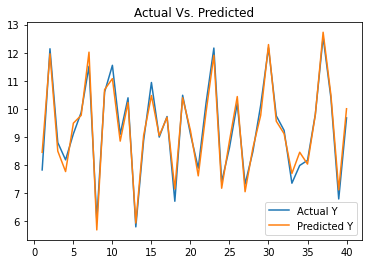

In [214]:
import matplotlib.pyplot as plt 

# Checking answer
alphaStar = LA.inv(x.T@x)@x.T@y
xaxis = np.arange(1,41)
yhat = x @ alphaStar
plt.plot(xaxis,y,label='Actual Y')
plt.plot(xaxis,yhat, label='Predicted Y')
plt.legend()
plt.title("Actual Vs. Predicted")
plt.show()

I prefer the batch gradient descent as the results were closer to the true minimum with the parameters I chose.